<a href="https://colab.research.google.com/github/AlejoGalloM/MachineLearning/blob/master/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import time

from random import randint
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.preprocessing import StandardScaler
import xgboost as xgb

from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from tensorflow.keras.datasets import fashion_mnist

import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data();
print(X_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


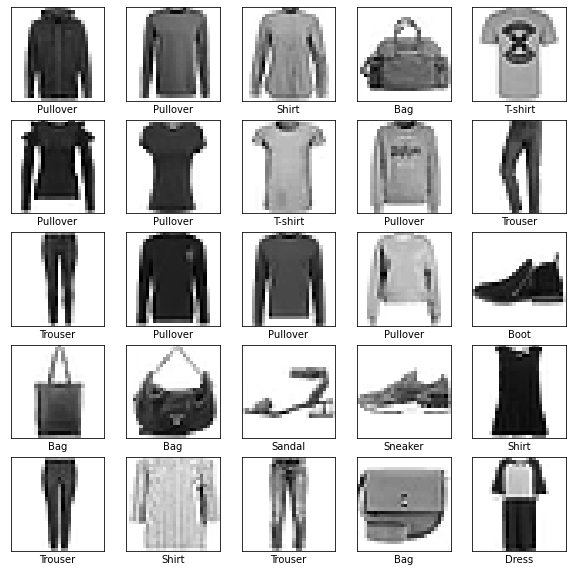

In [ ]:
class_names=['T-shirt','Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag','Boot']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  n=randint(0,X_train.shape[0])
  plt.imshow(X_train[n], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[n]])

In [ ]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

print(X_train.shape)

(60000, 784)


In [ ]:
model = XGBClassifier(n_estimators=88, max_depth=3, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

start_time = time.time()
model.fit(X_train, y_train, verbose=True)
print('Tiempo de ejecucio en segundos: ', (time.time()-start_time))

Tiempo de ejecucio en segundos:  652.939900636673


In [ ]:
y_pred=model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.74      0.76      0.75      1000
           3       0.85      0.89      0.87      1000
           4       0.74      0.77      0.75      1000
           5       0.97      0.93      0.95      1000
           6       0.67      0.57      0.62      1000
           7       0.91      0.93      0.92      1000
           8       0.95      0.96      0.95      1000
           9       0.92      0.95      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.85      0.86      0.85     10000
weighted avg       0.85      0.86      0.85     10000

[[834   0   9  44   8   1  89   0  15   0]
 [  5 957   5  25   3   0   3   0   2   0]
 [ 15   0 758  10 139   0  72   0   6   0]
 [ 27   6  13 890  28   0  34   0   2   0]
 [  0   1 112  40 774   0  71   0   2   0]
 [  0   0   0   1   0 932 

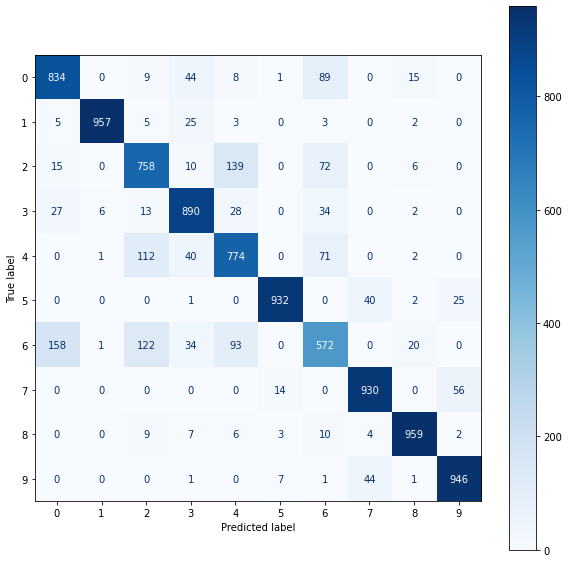

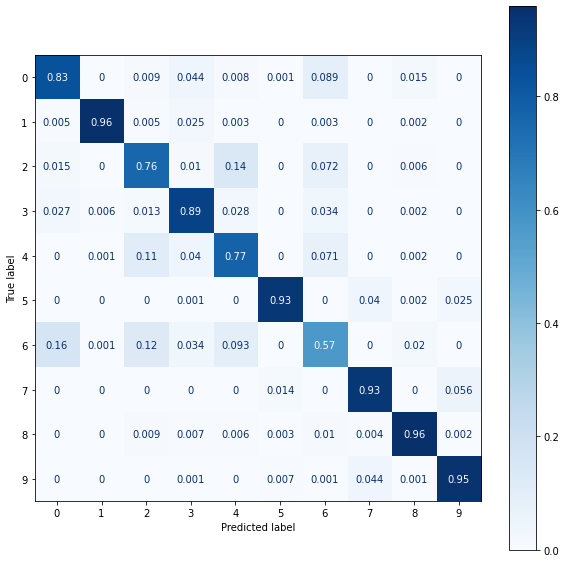

In [ ]:
_,ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', ax=ax, values_format='.0f')

_,ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', ax=ax, normalize='true')

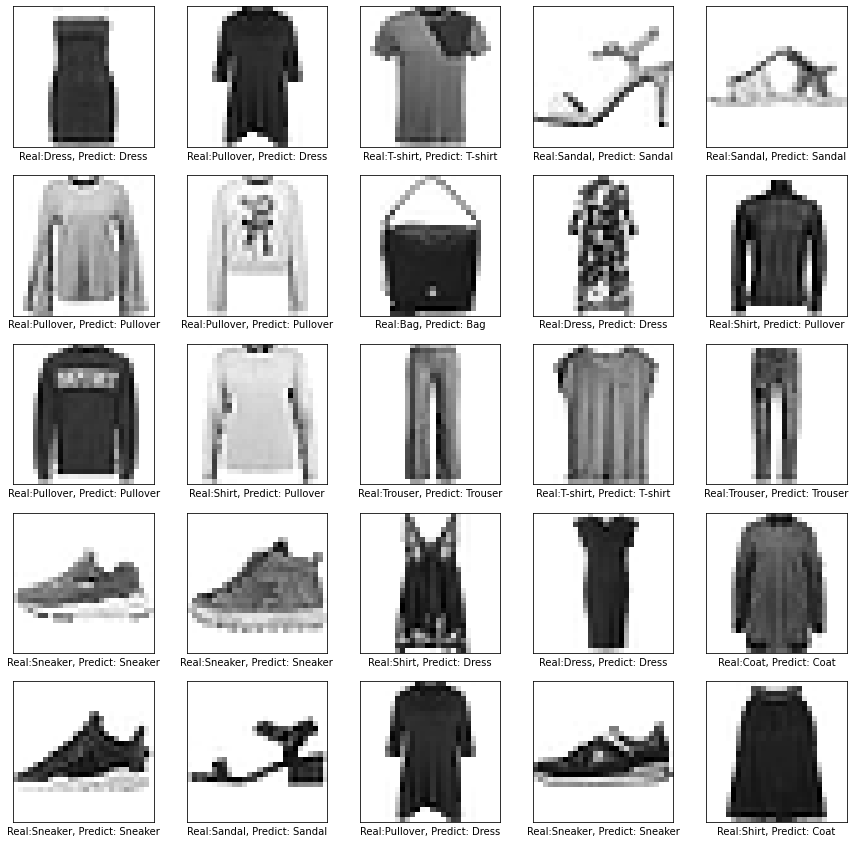

In [ ]:
(X_Train, y_train), (X_test, y_test) = fashion_mnist.load_data()
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  n=randint(0,X_test.shape[0])
  plt.imshow(X_test[n], cmap=plt.cm.binary)
  plt.xlabel('Real:' + class_names[y_test[n]]+', Predict: '+class_names[y_pred[n]])